<a href="https://colab.research.google.com/github/AQUIROSC24/ID_Agriculture/blob/Id_Units/MSc_on_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio
!pip install ultralytics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
from rasterio.windows import Window
import geopandas as gpd
from shapely.geometry import Point
from scipy.ndimage import label, center_of_mass
from PIL import Image
from ultralytics import YOLO

In [ ]:
# DIRECTORIO DEL MODELO DE TRABAJO
model_path = '/content/drive/MyDrive/FILADELFIA/best.pt'
model = YOLO(model_path)

In [ ]:
# TEST DOBLE GUARDADO
from ultralytics import YOLO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

# Cargar el modelo YOLO
model_path = '/content/drive/MyDrive/FILADELFIA/best.pt'
model = YOLO(model_path)

# Directorios de entrada y salida
input_dir = '/content/drive/MyDrive/FILADELFIA/JPEG'
output_dir_points = '/content/drive/MyDrive/FILADELFIA/SALIDAS'
output_dir_patches = '/content/drive/MyDrive/FILADELFIA/SALIDAS_RESID'

# Función para procesar cada imagen
def process_image(image_path, output_path_points, output_path_patches):
    image = Image.open(image_path)
    results = model(image)  # Aplicar el modelo YOLO a la imagen

    # Convertir la imagen PIL a un array de numpy
    image_np = np.array(image)
    mask = np.zeros_like(image_np)  # Crear una máscara con las mismas dimensiones que la imagen

    # Preparar para dibujar puntos
    fig, ax = plt.subplots(1, figsize=(image_np.shape[1] / 100, image_np.shape[0] / 100), dpi=100)
    ax.imshow(image_np)
    ax.axis('off')
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # Dibujar puntos y cajas rellenas
    for result in results:
        boxes = result.boxes.data
        for box in boxes:
            x_center, y_center = (box[0] + box[2]) / 2, (box[1] + box[3]) / 2
            x_center = x_center.cpu().numpy()
            y_center = y_center.cpu().numpy()
            ax.plot(x_center, y_center, 'ro', markersize=10)  # Dibujar punto rojo

            # Crear caja reducida para la máscara
            width = box[2] - box[0]
            height = box[3] - box[1]
            new_width = width * 0.60
            new_height = height * 0.60
            center_x = box[0] + width / 2
            center_y = box[1] + height / 2
            new_x1 = int(center_x - new_width / 2)
            new_y1 = int(center_y - new_height / 2)
            new_x2 = int(center_x + new_width / 2)
            new_y2 = int(center_y + new_height / 2)
            mask[new_y1:new_y2, new_x1:new_x2] = 255  # Aplicar color blanco a las áreas clasificadas

    # Guardar la imagen con puntos
    plt.savefig(output_path_points, bbox_inches='tight', pad_inches=0)
    plt.close(fig)  # Cierra la figura para liberar memoria

    # Oscurecer las áreas clasificadas y guardar la imagen con parches negros
    combined = np.where(mask == 255, 0, image_np)  # Aplicar el parche negro
    output_image = Image.fromarray(combined)
    output_image.save(output_path_patches)

import os

def ensure_directory_exists(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)  # This will create the directory if it does not exist

# Call this function for your output directories before the loop that processes the images
ensure_directory_exists(output_dir_points)
ensure_directory_exists(output_dir_patches)

# Now your loop can safely attempt to write files
for filename in os.listdir(input_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        file_path = os.path.join(input_dir, filename)
        output_path_points = os.path.join(output_dir_points, filename)
        output_path_patches = os.path.join(output_dir_patches, filename)
        process_image(file_path, output_path_points, output_path_patches)
        print(f'Procesado: {filename}')


Streaming output truncated to the last 5000 lines.

0: 640x640 223 bananas, 10.3ms
Speed: 1.5ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Procesado: segment_26_18.jpg

0: 640x640 228 bananas, 9.8ms
Speed: 1.5ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Procesado: segment_26_17.jpg

0: 640x640 182 bananas, 10.0ms
Speed: 1.5ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Procesado: segment_26_19.jpg

0: 640x640 29 bananas, 9.8ms
Speed: 1.6ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Procesado: segment_26_20.jpg

0: 640x640 (no detections), 9.9ms
Speed: 1.6ms preprocess, 9.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Procesado: segment_26_21.jpg

0: 640x640 65 bananas, 11.3ms
Speed: 1.6ms preprocess, 11.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Procesado: segment_26_22.jpg

0: 6

In [ ]:
# RONDA 2 y 3
# TEST DOBLE GUARDADO
from ultralytics import YOLO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

# Cargar el modelo YOLO
model_path = '/content/drive/MyDrive/FILADELFIA/best.pt'
model = YOLO(model_path)

# Directorios de entrada y salida
input_dir = '/content/drive/MyDrive/FILADELFIA/SALIDAS_RESID'
output_dir_points = '/content/drive/MyDrive/FILADELFIA/RES1_CLASS'
output_dir_patches = '/content/drive/MyDrive/FILADELFIA/SALIDAS_RESID2'

# Función para procesar cada imagen
def process_image(image_path, output_path_points, output_path_patches):
    image = Image.open(image_path)
    results = model(image)  # Aplicar el modelo YOLO a la imagen

    # Convertir la imagen PIL a un array de numpy
    image_np = np.array(image)
    mask = np.zeros_like(image_np)  # Crear una máscara con las mismas dimensiones que la imagen

    # Preparar para dibujar puntos
    fig, ax = plt.subplots(1, figsize=(image_np.shape[1] / 100, image_np.shape[0] / 100), dpi=100)
    ax.imshow(image_np)
    ax.axis('off')
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # Dibujar puntos y cajas rellenas
    for result in results:
        boxes = result.boxes.data
        for box in boxes:
            x_center, y_center = (box[0] + box[2]) / 2, (box[1] + box[3]) / 2
            x_center = x_center.cpu().numpy()
            y_center = y_center.cpu().numpy()
            ax.plot(x_center, y_center, 'ro', markersize=10)  # Dibujar punto rojo

            # Crear caja reducida para la máscara
            width = box[2] - box[0]
            height = box[3] - box[1]
            new_width = width * 0.60
            new_height = height * 0.60
            center_x = box[0] + width / 2
            center_y = box[1] + height / 2
            new_x1 = int(center_x - new_width / 2)
            new_y1 = int(center_y - new_height / 2)
            new_x2 = int(center_x + new_width / 2)
            new_y2 = int(center_y + new_height / 2)
            mask[new_y1:new_y2, new_x1:new_x2] = 255  # Aplicar color blanco a las áreas clasificadas

    # Guardar la imagen con puntos
    plt.savefig(output_path_points, bbox_inches='tight', pad_inches=0)
    plt.close(fig)  # Cierra la figura para liberar memoria

    # Oscurecer las áreas clasificadas y guardar la imagen con parches negros
    combined = np.where(mask == 255, 0, image_np)  # Aplicar el parche negro
    output_image = Image.fromarray(combined)
    output_image.save(output_path_patches)

import os

def ensure_directory_exists(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)  # This will create the directory if it does not exist

# Call this function for your output directories before the loop that processes the images
ensure_directory_exists(output_dir_points)
ensure_directory_exists(output_dir_patches)

# Now your loop can safely attempt to write files
for filename in os.listdir(input_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        file_path = os.path.join(input_dir, filename)
        output_path_points = os.path.join(output_dir_points, filename)
        output_path_patches = os.path.join(output_dir_patches, filename)
        process_image(file_path, output_path_points, output_path_patches)
        print(f'Procesado: {filename}')

Streaming output truncated to the last 5000 lines.

0: 640x640 33 bananas, 10.2ms
Speed: 1.5ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Procesado: segment_26_18.jpg

0: 640x640 32 bananas, 10.0ms
Speed: 1.6ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Procesado: segment_26_17.jpg

0: 640x640 35 bananas, 14.1ms
Speed: 1.5ms preprocess, 14.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Procesado: segment_26_19.jpg

0: 640x640 6 bananas, 10.2ms
Speed: 1.5ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Procesado: segment_26_20.jpg

0: 640x640 (no detections), 10.2ms
Speed: 1.6ms preprocess, 10.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Procesado: segment_26_21.jpg

0: 640x640 7 bananas, 10.3ms
Speed: 1.5ms preprocess, 10.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Procesado: segment_26_22.jpg

0: 

Streaming output truncated to the last 5000 lines.
Procesado: segment_44_37.jpg

0: 640x640 3 bananas, 9.7ms
Speed: 1.6ms preprocess, 9.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Procesado: segment_44_38.jpg

0: 640x640 6 bananas, 9.6ms
Speed: 1.5ms preprocess, 9.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Procesado: segment_44_34.jpg

0: 640x640 9 bananas, 9.7ms
Speed: 1.5ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Procesado: segment_44_40.jpg

0: 640x640 1 banana, 9.8ms
Speed: 1.6ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Procesado: segment_44_39.jpg

0: 640x640 4 bananas, 9.8ms
Speed: 1.5ms preprocess, 9.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Procesado: segment_44_41.jpg

0: 640x640 16 bananas, 13.8ms
Speed: 1.5ms preprocess, 13.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Procesado: segment_44_4

KeyboardInterrupt: 

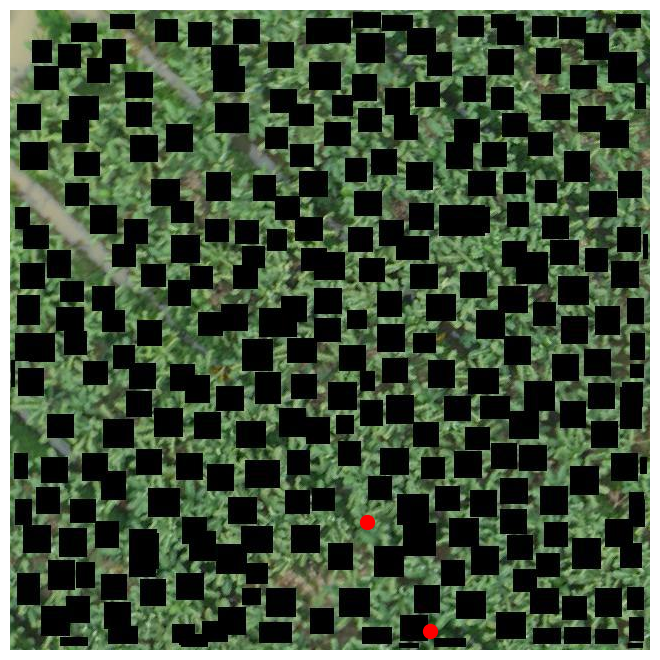

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Directorios de entrada y salida
input_dir = '/content/drive/MyDrive/FILADELFIA/SALIDAS_RESID2'
output_dir = '/content/drive/MyDrive/FILADELFIA/RES2_CLASS'

# Asegúrate de que el directorio de salida existe
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Función para procesar cada imagen
def process_image(image_path, output_path):
    image = Image.open(image_path)
    results = model(image)  # Supone que ya tienes un modelo de detección cargado y configurado

    # Función para dibujar puntos en lugar de cajas
    def draw_points(image, results):
        image_np = np.array(image)  # Convertir la imagen PIL a un array de numpy
        fig, ax = plt.subplots(1, figsize=(image_np.shape[1] / 100, image_np.shape[0] / 100), dpi=100)
        ax.imshow(image_np)
        ax.axis('off')
        fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

        for result in results:
            boxes = result.boxes.data
            for box in boxes:
                x_center, y_center = (box[0] + box[2]) / 2, (box[1] + box[3]) / 2
                x_center = x_center.cpu().numpy()
                y_center = y_center.cpu().numpy()
                ax.plot(x_center, y_center, 'ro', markersize=10)

        plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
        plt.close(fig)  # Cierra la figura para liberar memoria

    draw_points(image, results)

# Iterar sobre todos los archivos en el directorio de entrada
for filename in os.listdir(input_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Verifica los formatos de imagen
        file_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename)
        process_image(file_path, output_path)
        print(f'Procesado: {filename}')

In [ ]:
# RONDA 2 y 3
# TEST DOBLE GUARDADO
from ultralytics import YOLO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

# Cargar el modelo YOLO
model_path = '/content/drive/MyDrive/FILADELFIA/best.pt'
model = YOLO(model_path)

# Directorios de entrada y salida
input_dir = '/content/drive/MyDrive/FILADELFIA/SALIDAS_RESID2'
output_dir_points = '/content/drive/MyDrive/FILADELFIA/RES2_CLASS'
output_dir_patches = '/content/drive/MyDrive/FILADELFIA/SALIDAS_RESID3'

# Función para procesar cada imagen
def process_image(image_path, output_path_points, output_path_patches):
    image = Image.open(image_path)
    results = model(image)  # Aplicar el modelo YOLO a la imagen

    # Convertir la imagen PIL a un array de numpy
    image_np = np.array(image)
    mask = np.zeros_like(image_np)  # Crear una máscara con las mismas dimensiones que la imagen

    # Preparar para dibujar puntos
    fig, ax = plt.subplots(1, figsize=(image_np.shape[1] / 100, image_np.shape[0] / 100), dpi=100)
    ax.imshow(image_np)
    ax.axis('off')
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # Dibujar puntos y cajas rellenas
    for result in results:
        boxes = result.boxes.data
        for box in boxes:
            x_center, y_center = (box[0] + box[2]) / 2, (box[1] + box[3]) / 2
            x_center = x_center.cpu().numpy()
            y_center = y_center.cpu().numpy()
            ax.plot(x_center, y_center, 'ro', markersize=10)  # Dibujar punto rojo

            # Crear caja reducida para la máscara
            width = box[2] - box[0]
            height = box[3] - box[1]
            new_width = width * 0.60
            new_height = height * 0.60
            center_x = box[0] + width / 2
            center_y = box[1] + height / 2
            new_x1 = int(center_x - new_width / 2)
            new_y1 = int(center_y - new_height / 2)
            new_x2 = int(center_x + new_width / 2)
            new_y2 = int(center_y + new_height / 2)
            mask[new_y1:new_y2, new_x1:new_x2] = 255  # Aplicar color blanco a las áreas clasificadas

    # Guardar la imagen con puntos
    plt.savefig(output_path_points, bbox_inches='tight', pad_inches=0)
    plt.close(fig)  # Cierra la figura para liberar memoria

    # Oscurecer las áreas clasificadas y guardar la imagen con parches negros
    combined = np.where(mask == 255, 0, image_np)  # Aplicar el parche negro
    output_image = Image.fromarray(combined)
    output_image.save(output_path_patches)

import os

def ensure_directory_exists(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)  # This will create the directory if it does not exist

# Call this function for your output directories before the loop that processes the images
ensure_directory_exists(output_dir_points)
ensure_directory_exists(output_dir_patches)

# Now your loop can safely attempt to write files
for filename in os.listdir(input_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        file_path = os.path.join(input_dir, filename)
        output_path_points = os.path.join(output_dir_points, filename)
        output_path_patches = os.path.join(output_dir_patches, filename)
        process_image(file_path, output_path_points, output_path_patches)
        print(f'Procesado: {filename}')

Streaming output truncated to the last 5000 lines.

0: 640x640 2 bananas, 9.8ms
Speed: 1.5ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Procesado: segment_26_18.jpg

0: 640x640 4 bananas, 10.3ms
Speed: 1.6ms preprocess, 10.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Procesado: segment_26_17.jpg

0: 640x640 3 bananas, 10.0ms
Speed: 1.6ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Procesado: segment_26_19.jpg

0: 640x640 1 banana, 10.0ms
Speed: 1.5ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Procesado: segment_26_20.jpg

0: 640x640 (no detections), 12.9ms
Speed: 1.9ms preprocess, 12.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Procesado: segment_26_21.jpg

0: 640x640 (no detections), 15.5ms
Speed: 1.8ms preprocess, 15.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Procesado: segment_26_22.jpg

0: 

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Directorios de entrada y salida
input_dir = '/content/drive/MyDrive/FILADELFIA/SALIDAS_RESID3'
output_dir = '/content/drive/MyDrive/FILADELFIA/RES3_CLASS'

# Asegúrate de que el directorio de salida existe
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Función para procesar cada imagen
def process_image(image_path, output_path):
    image = Image.open(image_path)
    results = model(image)  # Supone que ya tienes un modelo de detección cargado y configurado

    # Función para dibujar puntos en lugar de cajas
    def draw_points(image, results):
        image_np = np.array(image)  # Convertir la imagen PIL a un array de numpy
        fig, ax = plt.subplots(1, figsize=(image_np.shape[1] / 100, image_np.shape[0] / 100), dpi=100)
        ax.imshow(image_np)
        ax.axis('off')
        fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

        for result in results:
            boxes = result.boxes.data
            for box in boxes:
                x_center, y_center = (box[0] + box[2]) / 2, (box[1] + box[3]) / 2
                x_center = x_center.cpu().numpy()
                y_center = y_center.cpu().numpy()
                ax.plot(x_center, y_center, 'ro', markersize=10)

        plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
        plt.close(fig)  # Cierra la figura para liberar memoria

    draw_points(image, results)

# Iterar sobre todos los archivos en el directorio de entrada
for filename in os.listdir(input_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Verifica los formatos de imagen
        file_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename)
        process_image(file_path, output_path)
        print(f'Procesado: {filename}')

Streaming output truncated to the last 5000 lines.

0: 640x640 (no detections), 9.7ms
Speed: 1.4ms preprocess, 9.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Procesado: segment_26_18.jpg

0: 640x640 1 banana, 10.3ms
Speed: 1.5ms preprocess, 10.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Procesado: segment_26_17.jpg

0: 640x640 1 banana, 10.1ms
Speed: 1.5ms preprocess, 10.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Procesado: segment_26_19.jpg

0: 640x640 (no detections), 10.2ms
Speed: 1.5ms preprocess, 10.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Procesado: segment_26_20.jpg

0: 640x640 (no detections), 9.7ms
Speed: 1.4ms preprocess, 9.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Procesado: segment_26_21.jpg

0: 640x640 (no detections), 9.8ms
Speed: 1.5ms preprocess, 9.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Procesado: segment_26_22.j

In [ ]:
# NO HUBIERON DETECCIONES POSTERIOR A ESTA RONDA

In [ ]:
# COMO DESCARGAR UN ZIP
import shutil
import os

# Carpeta que deseas comprimir
folder_to_zip = '/content/drive/MyDrive/FILADELFIA/SALIDAS'

# Nombre del archivo zip
zip_file_name = '/content/SALIDAS_R1.zip'

# Comprimir la carpeta en un archivo zip
shutil.make_archive(zip_file_name.split('.zip')[0], 'zip', folder_to_zip)

# Descargar el archivo zip
from google.colab import files
files.download(zip_file_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# COMO DESCARGAR UN ZIP
import shutil
import os

# Carpeta que deseas comprimir
folder_to_zip = '/content/drive/MyDrive/FILADELFIA/RES1_CLASS'

# Nombre del archivo zip
zip_file_name = '/content/RES1_CLASS.zip'

# Comprimir la carpeta en un archivo zip
shutil.make_archive(zip_file_name.split('.zip')[0], 'zip', folder_to_zip)

# Descargar el archivo zip
from google.colab import files
files.download(zip_file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# COMO DESCARGAR UN ZIP
import shutil
import os

# Carpeta que deseas comprimir
folder_to_zip = '/content/drive/MyDrive/FILADELFIA/RES2_CLASS'

# Nombre del archivo zip
zip_file_name = '/content/RES2_CLASS.zip'

# Comprimir la carpeta en un archivo zip
shutil.make_archive(zip_file_name.split('.zip')[0], 'zip', folder_to_zip)

# Descargar el archivo zip
from google.colab import files
files.download(zip_file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# COMO DESCARGAR UN ZIP
import shutil
import os

# Carpeta que deseas comprimir
folder_to_zip = '/content/drive/MyDrive/FILADELFIA/RES3_CLASS'

# Nombre del archivo zip
zip_file_name = '/content/RES3_CLASS.zip'

# Comprimir la carpeta en un archivo zip
shutil.make_archive(zip_file_name.split('.zip')[0], 'zip', folder_to_zip)

# Descargar el archivo zip
from google.colab import files
files.download(zip_file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# COMO DESCARGAR UN ZIP
import shutil
import os

# Carpeta que deseas comprimir
folder_to_zip = '/content/drive/MyDrive/FILADELFIA'

# Nombre del archivo zip
zip_file_name = '/content/FILADELFIA_TODO.zip'

# Comprimir la carpeta en un archivo zip
shutil.make_archive(zip_file_name.split('.zip')[0], 'zip', folder_to_zip)

# Descargar el archivo zip
from google.colab import files
files.download(zip_file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>